In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import os
%matplotlib inline

In [2]:
#os.chdir("C:\\Users\\Admin\\Desktop\\Training\\DSP25\\DT&RF")
os.chdir("C:\\Users\\Admin\\Desktop\\Training\\DSP31\\Python\\Treebased")
# C:\Users\Admin\Desktop\Training\DSP31\Python\Treebased

In [3]:
bank=pd.read_excel('bank.xlsx')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [33]:
len(bank.columns)

17

In [34]:
# Check if the data set contains any null values - Nothing found!
bank[bank.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [35]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


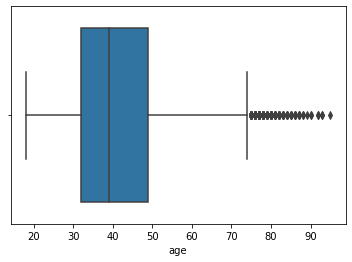

In [36]:
# Boxplot for 'age'
g = sns.boxplot(x=bank["age"])

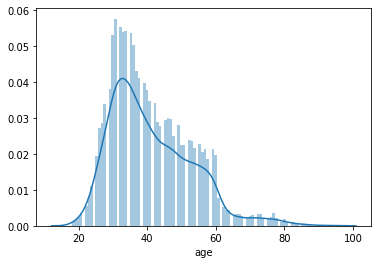

In [37]:
# Distribution of Age
sns.distplot(bank.age, bins=100)
plt.show()

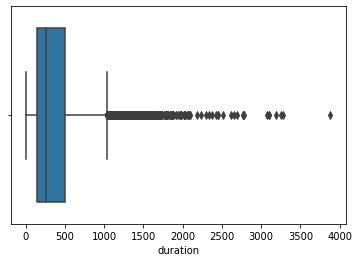

In [38]:
# Boxplot for 'duration'
g = sns.boxplot(x=bank["duration"])

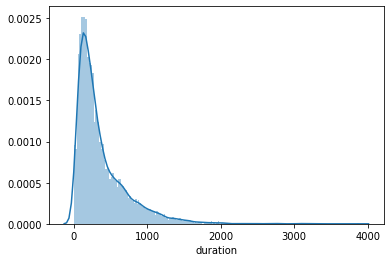

In [4]:
sns.distplot(bank.duration, bins=200)

### Convert Categorical Data

In [6]:
# Make a copy for parsing
bank_data = bank.copy()

In [7]:
# Explore People who made a deposit Vs Job category
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']
for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [11]:
# Different types of job categories and their counts
bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [8]:
# Combine similar jobs into categiroes
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')


In [10]:
# New value counts
bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

###### ---------------------------------------------------poutcome-----------------------------------------------

In [12]:
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [46]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [13]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

##### ---------------------------------------------------contact-----------------------------------------------

In [14]:
bank_data.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [15]:
# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)

In [16]:
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

In [17]:
bank_data.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [18]:
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

In [19]:
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

In [20]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [21]:
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

In [22]:
bank_data.head()

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat
0,59,white-collar,married,secondary,2343,1042,1,-1,0,unknown,0,1,0,1
1,56,white-collar,married,secondary,45,1467,1,-1,0,unknown,0,0,0,1
2,41,technician,married,secondary,1270,1389,1,-1,0,unknown,0,1,0,1
3,55,pink-collar,married,secondary,2476,579,1,-1,0,unknown,0,1,0,1
4,54,white-collar,married,tertiary,184,673,2,-1,0,unknown,0,0,0,1


In [23]:
# pdays: number of days that passed by after the client was last contacted from a
#        previous campaign
#       -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [24]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'default_cat', 'housing_cat',
       'loan_cat', 'deposit_cat'],
      dtype='object')

In [25]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [26]:
# Create a new column:  
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data["pdays"], 1/bank_data["pdays"])
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [27]:
bank_data.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
11157,33,blue-collar,single,primary,1,257,1,0,unknown,0,1,0,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,0,0,0,0,0.000100
11159,32,technician,single,secondary,29,156,2,0,unknown,0,0,0,0,0.000100
11160,43,technician,married,secondary,0,9,2,5,failure,0,0,1,0,0.005814
11161,34,technician,married,secondary,0,628,1,0,unknown,0,0,0,0,0.000100


##### -------------Convert to Dummy Values-------------------

In [31]:
# Convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,...,0,1,0,0,0,1,0,0,0,1


In [32]:
len(bank_with_dummies.columns)

27

In [33]:
bank_data.shape

(11162, 14)

In [34]:
bank_with_dummies.shape

(11162, 27)

In [35]:
bank_with_dummies.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


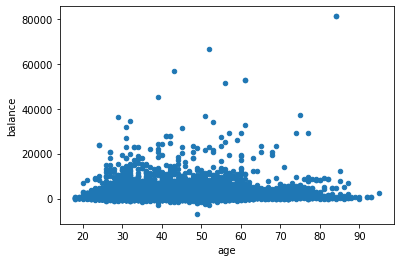

In [36]:
# Scatterplot showing age and balance
bank_with_dummies.plot(kind='scatter', x='age', y='balance');

# Across all ages, majority of people have savings of less than 20000.

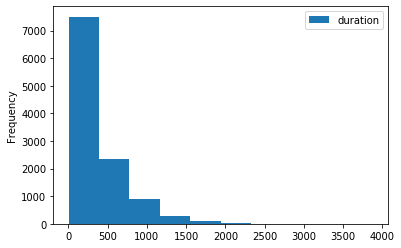

In [37]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

In [67]:
#Analysis on people who sign up for a term deposite
# People who sign up to a term deposite
bank_with_dummies[bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# People signed up to a term deposite having a personal loan (loan_cat) and housing loan (housing_cat)
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.loan_cat) & (bank_with_dummies.housing_cat)])

265

In [39]:
# People signed up to a term deposite with a credit default 
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.default_cat ==1)])

52

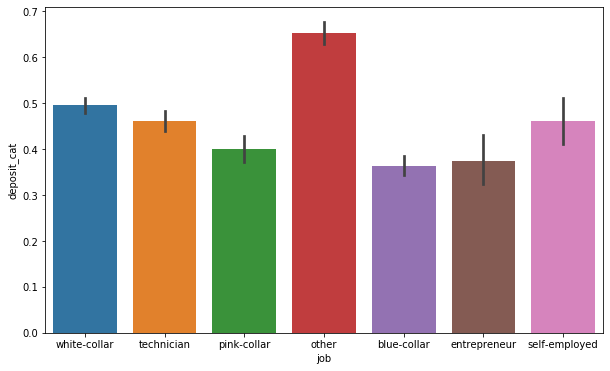

In [40]:
# Bar chart of job Vs deposite
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = bank_data)

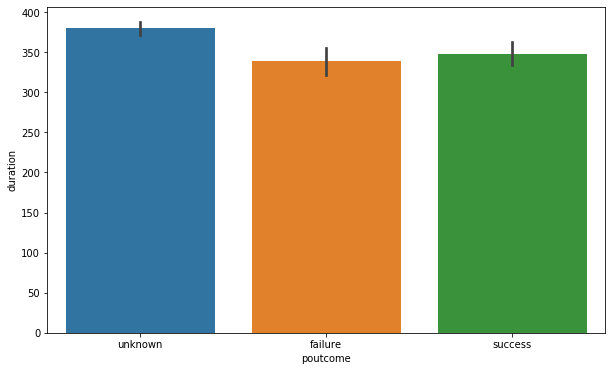

In [41]:
# Bar chart of "previous outcome" Vs "call duration"

plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

In [42]:
# make a copy
bankcl = bank_with_dummies

In [43]:
# The Correltion matrix
corr = bankcl.corr()
corr

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


Text(0.5, 1, 'Heatmap of Correlation Matrix')

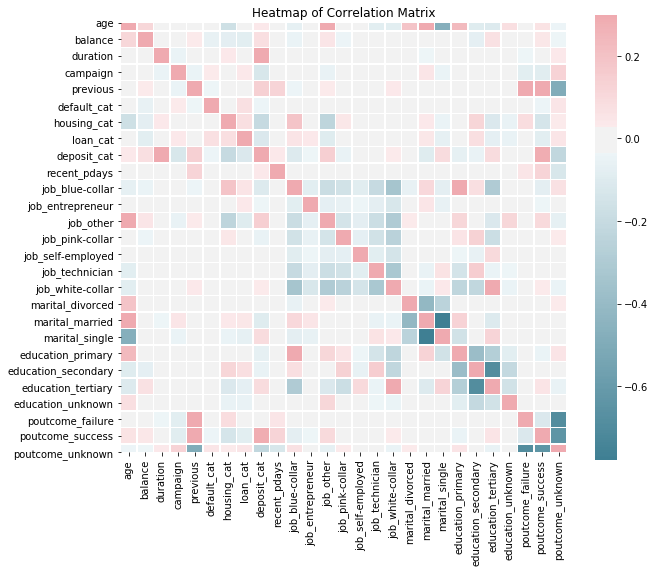

In [44]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [45]:
# Extract the deposte_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


In [46]:
bankcl.to_csv("rf_bank.csv")

In [47]:
# Train-Test split: 20% test data
data_drop_deposite = bankcl.drop('deposit_cat', 1)
label = bankcl.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.2, random_state = 50)

In [48]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

In [49]:
# DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
#                            min_samples_split=2, min_samples_leaf=1, 
#                            min_weight_fraction_leaf=0.0, max_features=None, 
#                            random_state=None, max_leaf_nodes=None, 
#                            min_impurity_decrease=0.0, 
#                            min_impurity_split=None, 
#                            class_weight=None, 
#                            presort=False)

In [50]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)


In [51]:
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.7285250307985217
Testing score:  0.7268248992386923


In [57]:
# Decision tree with depth = 6
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=10)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.8605666927987456
Testing score:  0.7850425436632333


In [53]:
# Decision tree: To the full depth
dt1 = tree.DecisionTreeClassifier(random_state=1)
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.7384684281236006


In [59]:
dt1.get_depth

<bound method BaseDecisionTree.get_depth of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')>

In [60]:
# Create a feature vector
features = data_drop_deposite.columns.tolist()

In [61]:
dt1.feature_importances_

array([0.10826376, 0.1320194 , 0.3908928 , 0.04450689, 0.01404926,
       0.00105116, 0.04713879, 0.00993372, 0.08494012, 0.00780482,
       0.00488428, 0.00619033, 0.00594959, 0.00269934, 0.01114321,
       0.01221539, 0.0084127 , 0.00921588, 0.00703555, 0.00747176,
       0.01042916, 0.00988769, 0.00590225, 0.0019688 , 0.04892563,
       0.00706774])

In [62]:
# Investigate most important features with depth =6

dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)

# Fit the decision tree classifier
dt3.fit(data_train, label_train)

fi = dt3.feature_importances_

feature_imp=pd.DataFrame({"Features":data_train.columns, "Impo":dt3.feature_importances_}).sort_values("Impo",ascending=False)

In [64]:
feature_imp.to_csv("Feature_imp.csv")

In [65]:
# According to feature importance results, most importtant feature is the "Duration"
# Let's calculte statistics on Duration
print("Mean duration   : ", data_drop_deposite.duration.mean())
print("Maximun duration: ", data_drop_deposite.duration.max())
print("Minimum duration: ", data_drop_deposite.duration.min())

Mean duration   :  371.99381831213043
Maximun duration:  3881
Minimum duration:  2


In [93]:
dt6.predict(data_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(data_drop_deposite, label, test_size=0.2, random_state=2)

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[2,4,6,8,9,10,11,12],
              'class_weight':('balanced', None),
              'presort':(False,True)
             }


tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters, cv=10, verbose=2, n_jobs=-1)
gsearch.fit(X_train, y_train)
# model = gsearch.best_estimator_
# model

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:  4.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy'),
                 

In [67]:
gsearch.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 3,
 'presort': False}

In [68]:
gsearch.best_score_

0.795721805353343

In [100]:
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=8,min_samples_split=4,
                                  presort=False, criterion="gini")

In [101]:
dt4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [102]:
dt1_score_train = dt4.score(X_train, y_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt4.score(X_test, y_test)
print("Testing score: ", dt1_score_test)

Training score:  0.833463993728301
Testing score:  0.7877295118674429


In [103]:
# Fit the decision tree classifier

fi = dt4.feature_importances_

feature_imp=pd.DataFrame({"Features":X_train.columns, "Impo":dt4.feature_importances_}).sort_values("Impo",ascending=False)

In [105]:
feature_imp.to_csv("feat.csv")

In [106]:
data2=data_drop_deposite[['duration','poutcome_success','housing_cat','recent_pdays','age',
'balance','previous','campaign','loan_cat','job_other','education_tertiary','poutcome_unknown']]


In [107]:
X_train, X_test, y_train, y_test = train_test_split(data2, label, test_size=0.2, random_state=2)

In [108]:
dt4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [109]:
dt1_score_train = dt4.score(X_train, y_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt4.score(X_test, y_test)
print("Testing score: ", dt1_score_test)

Training score:  0.8313360958673983
Testing score:  0.7877295118674429


In [92]:
#Accuracy , Recall, precision, F1 score, AUC, ROC, KS , Lift, Selection of p value cut off.

In [117]:
probs=dt4.predict_proba(X_train)
pd.DataFrame(probs[:,1])

,0
0,0.005059
1,0.059341
2,0.005059
3,0.005059
4,0.974359
...,...
8924,0.813406
8925,0.802372
8926,0.112676
8927,0.980296


In [118]:
y_pred=dt4.predict(X_train)
X_train["p_1"]=dt4.predict_proba(X_train)[:,1]
X_train["y_actual"]=y_train
X_train["y_pred"]=y_pred


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [119]:
X_train["Rank"]=pd.qcut(X_train["p_1"], 10, labels=np.arange(0,10,1))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
X_train["Numb"]=10
X_train["Decile"]=X_train["Numb"]-X_train["Rank"].astype("int")
pd.DataFrame(X_train.groupby("Decile").apply(lambda x:pd.Series({
    "min_score"  :x["p_1"].min(),
    "max_score"  :x["p_1"].max(),
    "Event"      :x["y_actual"].sum(),
    "Non_event"  :x["y_actual"].count()-x["y_actual"].sum(),
    "Total"      :x["y_actual"].count()
})))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,min_score,max_score,Event,Non_event,Total
Decile,,,,,
1,0.933884,1.000000,836.0,17.0,853.0
2,0.880342,0.931452,528.0,50.0,578.0
3,0.819277,0.880295,745.0,116.0,861.0
4,0.656934,0.813406,987.0,287.0,1274.0
5,0.519274,0.636364,479.0,368.0,847.0
6,0.280576,0.500000,337.0,606.0,943.0
7,0.150000,0.268293,145.0,546.0,691.0
8,0.100000,0.146269,117.0,812.0,929.0
9,0.023529,0.088737,65.0,910.0,975.0


In [121]:
profile=pd.DataFrame(X_train.groupby("Decile").apply(lambda x:pd.Series({
    "min_score"  :x["p_1"].min(),
    "max_score"  :x["p_1"].max(),
    "Event"      :x["y_actual"].sum(),
    "Non_event"  :x["y_actual"].count()-x["y_actual"].sum(),
    "Total"      :x["y_actual"].count()
})))

In [122]:
profile.to_csv("profile.csv")

In [123]:
y_pred=dt4.predict(X_test)
X_test["p_1"]=dt4.predict_proba(X_test)[:,1]
X_test["y_actual"]=y_test
X_test["y_pred"]=y_pred
X_test["Rank"]=pd.qcut(X_test["p_1"], 10, labels=np.arange(0,10,1))
X_test["Numb"]=10
X_test["Decile"]=X_test["Numb"]-X_test["Rank"].astype("int")
profiletest=pd.DataFrame(X_test.groupby("Decile").apply(lambda x:pd.Series({
    "min_score"  :x["p_1"].min(),
    "max_score"  :x["p_1"].max(),
    "Event"      :x["y_actual"].sum(),
    "Non_event"  :x["y_actual"].count()-x["y_pred"].sum(),
    "Total"      :x["y_actual"].count()
})))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [124]:
profiletest.to_csv("profiletest.csv")

In [126]:
import sklearn.metrics as m 

In [127]:
X_train.columns

Index(['duration', 'poutcome_success', 'housing_cat', 'recent_pdays', 'age',
       'balance', 'previous', 'campaign', 'loan_cat', 'job_other',
       'education_tertiary', 'poutcome_unknown', 'p_1', 'y_actual', 'y_pred',
       'Rank', 'Numb', 'Decile'],
      dtype='object')

In [128]:
m.confusion_matrix(X_train['y_actual'],X_train['y_pred'] )

array([[3848,  838],
       [ 668, 3575]], dtype=int64)

In [133]:
fpr, tpr, thresholds = metrics.roc_curve(X_train['y_actual'],X_train['y_pred'])
metrics.auc(fpr, tpr)

0.8318668321572857

In [135]:
print(m.classification_report(X_train['y_actual'],X_train['y_pred']))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4686
           1       0.81      0.84      0.83      4243

    accuracy                           0.83      8929
   macro avg       0.83      0.83      0.83      8929
weighted avg       0.83      0.83      0.83      8929



In [ ]:
#Recall,precision, AUC, F1-Score, Accuracy, Lift, GINI index , Decile , Cut off of P,  

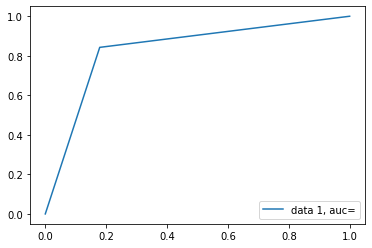

In [137]:

plt.plot(fpr,tpr,label="data 1, auc=")
plt.legend(loc=4)
plt.show()